- title: Занятие 13
- author: Vitalii Zavadskyi
- date: 2025-11-28
- slug: 2025_lpr_lab13
- ipynb_url: download/2025_lpr_lab13.ipynb

# Лабораторное занятие 13

 В этой лабораторной работе мы познакомимся с инструментами scikit-learn для решения задач регрессии. На этом семинаре мы познакомимся с моделями для обучения с учителем: `LogisticRegression`.

## Логистическая регресссия

Модель логистичкеской регрессии **не** является классической регрессией. Данная модель чаще всего используется для классификации объектов.

### Постановка задачи

Пускай есть набор признаков $w_i, i=\overline{0, M}$ и некоторая бинарная целевая метрика. Требуется определить **вероятность** $p$ принадлежности к одному из классов по набору параметров $w_i$.

Предположим, что принадлежность к опредленному классу приближенно можно описать линейной зависимостью от признаков:
$$ y = w_0 + w_1 x_1 +  \cdots w_n x_n, $$
где $x_i$ значение $i$-го признака.

Линейная функция может принимать почти любые значения, а вот **вероятность** это величина строго с отрезка $[0, 1]$. Мы можем поступить несколькими путями:
1. Смотреть на знак выражения и определять тем самым принадлежность объекта к опредленному классу
$$ y_i = \text{sign}\left(w^{T} x\right) = \text{sign}\left(w_0 + \sum\limits_{i=1}^{M} w_{i} x_i\right); $$
  - Знаковая функция имеет разрыв вблизи 0, что может плохо сказаться при поиске минимума (как взять производную?).
2. Можем обернуть линейное приближение в сигмоиду, которая принимает значения от 0 до 1
$$ \sigma(t) = \frac{1}{1 + e^{-t}} = \frac{1}{1 + \exp\left[-\left(w_0 + \sum\limits_{i=1}^{M} w_{i} x_i\right)\right]}. $$
  - Сигмоидная функция гладкая, а значит ее можно диференцировать без проблем;
  - Можно выбрать порог, превышение которого определит объект к определенному классу.

### Функция потерь

Разберем подробно вывод функции потерь для логистической регрессии. Ответом регрессии является вероятность, а вероятность можно описать с помощью функции распределения. В математической статистике используется объект *функция правдоподобия* для определения характеристик функции распределения.

Пусть величина описывается распределением $\phi$. Если каждая точка $y_i$ описывается с помощью $x_j, j = \overline{1, M}$ признаков и всего было набрано $N$ измерений, то общее распределение описывается как
$${\rm L}(y, x, w) = \prod\limits_{i = 1}^{N} \phi(y_i, x_i, w).$$
Параметры $w$ подбираются так, чтобы максимизировать *функцию правдоподобия*. С произведением множества функций сложно работать, прибегают к логарифмированию. Тогда
$$\log\left({\rm L}(y, x, w)\right) = \sum\limits_{i = 1}^{N} \log\left(\phi(y_i, x_i, w)\right) \sim \sum\limits_{i = 1}^{N} \log\left(p^{y_{i}}_{i} (1 - p_{i})^{1 - y_i} \right) = \sum\limits_{i = 1}^{N}\left[ y_i \log p_i + (1 - y_i)\log(1 - p_i) \right].$$
В последних двух преобразованиях был применен явный вид функции вероятности для бинарной классфикации (биномиальное распределение). Из последней части мы можем сделать два простых вывода:
- Если y_i = 1 (объект принадлежит первому типу класса), то остается лишь $\log p_i$,
- Если y_i = 0 (объект принадлежит второму типу класса), то остается лишь $\log (1 - p_i)$.

**Упраженение 1**: Изобразите функции выше, но со знаком $-$ (минус).

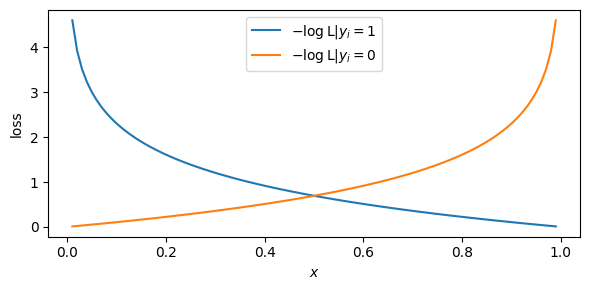

In [ ]:
import warnings
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(1e-2, 1 - 1.e-2, 101)

# Вставьте ваш код
loss1 = 
loss0 = 

plt.figure(figsize=(6, 3))
plt.plot(x, loss1, label=r"$-\log{\rm L}|y_i = 1$")
plt.plot(x, loss0, label=r"$-\log{\rm L}|y_i = 0$")
plt.xlabel(r"$x$")
plt.ylabel(r"loss")
plt.tight_layout()
plt.legend();

Подумайте, почему обучаться на одном объекте чревато проблемами.

Обучение алгоритма логистической регрессии сводится к поиску оптимального значения вектора весов $w$, который будет минимизировать сумму логарифмов на изображении выше.

## Breast cancer

Рассмотрим на примере данных о раке груди принцип работы логистической регрессии. Во-первых, загрузим данные.

In [2]:
import seaborn as sns
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
df = data.frame

print(data.DESCR)

df.head()

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Сделаем предварительнцю обработку данных. Уберем из данных все те строки, где отсутствует хоть какое-то значение из любого столбца.

In [4]:
print(f"Shape before: {df.shape}")

df = df.dropna()

print(f"Shape after: {df.shape}")

Shape before: (569, 31)
Shape after: (569, 31)


Таблица полна, значения имеются в каждой ячейке. Попробуем рассмотреть совместное распредение признаков и целевой метки. Мы ограничимся 5 столбцами, так как всего у нас 31 столбец и всех их отрисовывать накладно.

**Упражнение 2**: нарисуйте совместное распределение признаков `mean radius`, `mean perimeter`, `mean area`, `mean symmetry` и `target`.

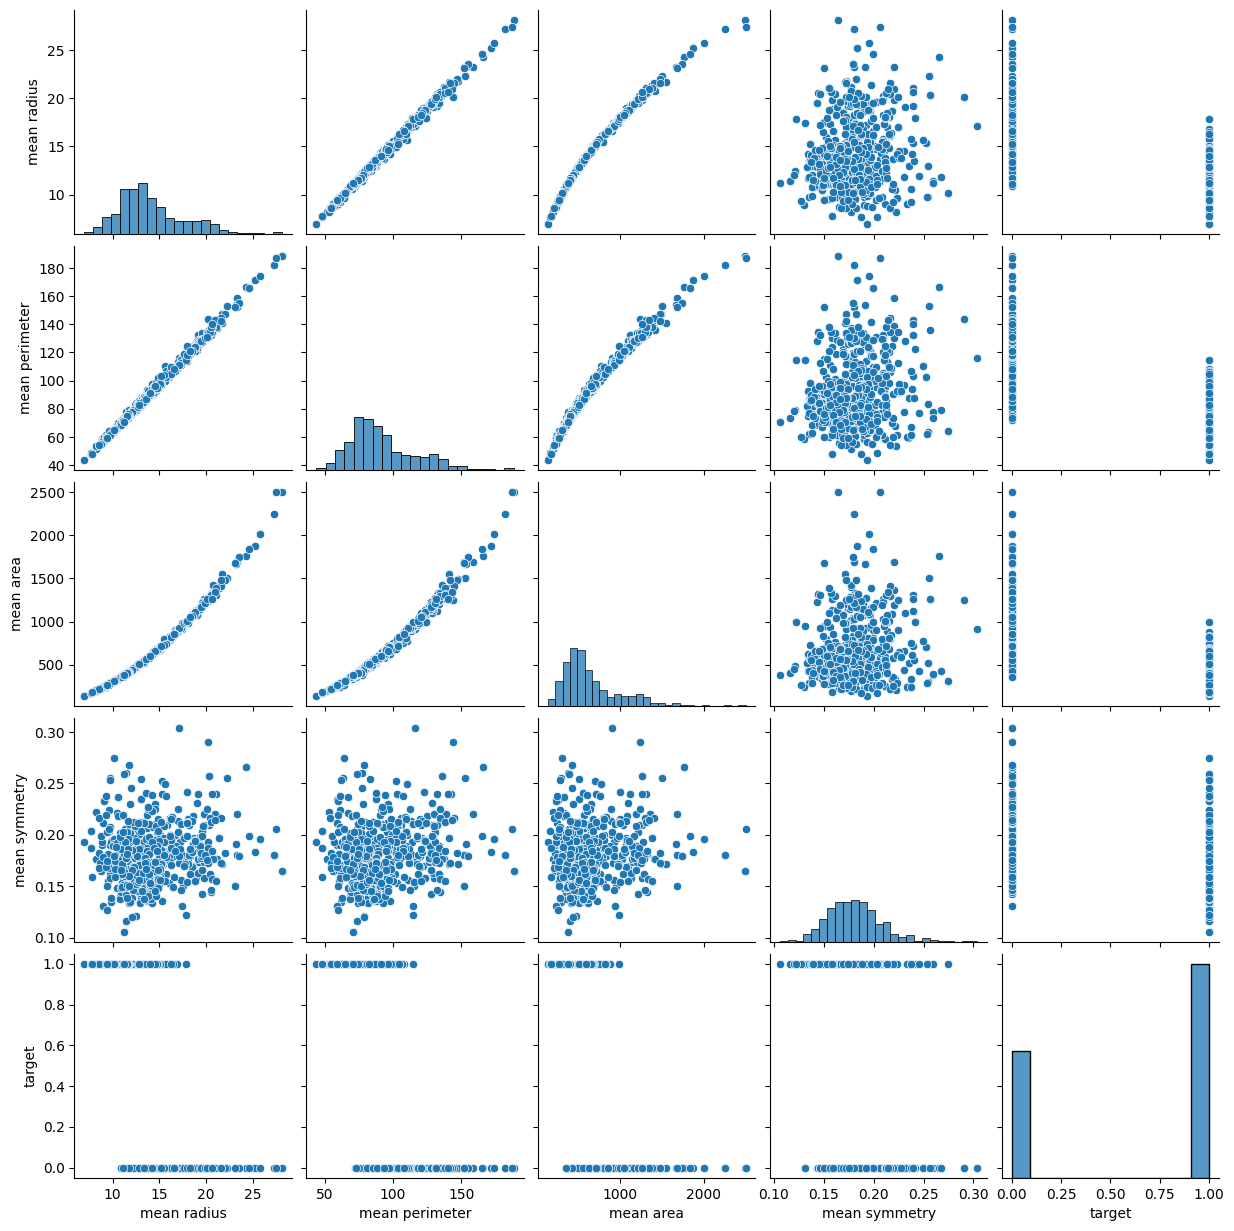

In [ ]:
# Вставьте ваш код

По распределениям выше подберем метрику, которая пойдет в основу логистической регрессии. Попробуем поработать с `mean perimeter`.

### Простая регрессия на одном параметре

Рассмотрим самый простой вариант регрессии, когда модель оперирует лишь одним признаком - возрастом. Выделим `mean perimeter` в "матрицу" `X`, а целевое значение `target` в столбец `y`.

In [6]:
X = df["mean perimeter"].to_numpy().astype(float)
y = df["target"].to_numpy().astype(int)

Разделим данные на тренировочные и тестовые.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape, X_test.shape

((426,), (143,))

Добавим вспомогательную функцию сигмоиды.

In [8]:
def sigmoid(x):
    if x >=0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)

sigmoid = np.vectorize(sigmoid)

**Упражнение 3**: попробуйте отрисовать функции потерь $-\log p_i$ и $-\log (1 - p_i)$ и их сумму в несколько этапов:
1. Отобразите только показатель $t$ для нулевого экземпляра.
2. Отобразите значение сигмоды на показателе $t$ для нулевого экземпляра.
3. Отобразите функции потерь для нулевого экземпляра.

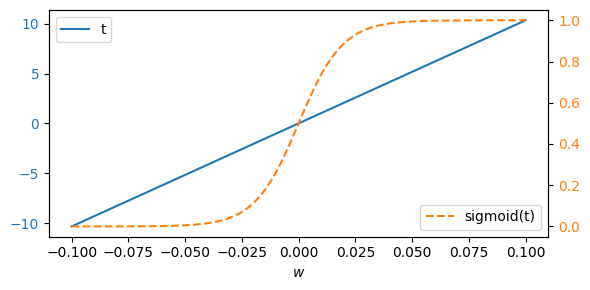

In [ ]:
w = np.linspace(-.1, .1, 101)
t_train = (X_train * w[:, np.newaxis])

plt.figure(figsize=(6, 3))
# Вставьте ваш код
# Дополните код
plt.plot(
plt.yticks(color="C0")
plt.legend(loc="upper left")
plt.xlabel(r"$w$")
plt.twinx()
# Вставьте ваш код
# Дополните код
plt.plot(
plt.yticks(color="C1")
plt.legend(loc="lower right")

plt.tight_layout();

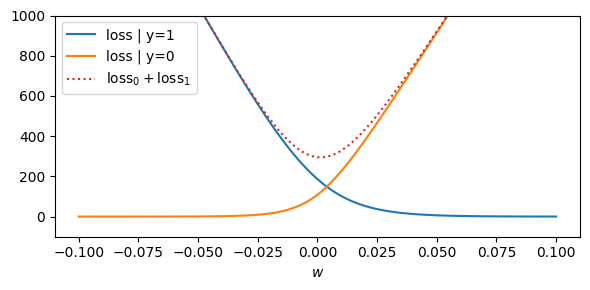

In [ ]:
loss0 = -((1 - y_train) * np.log(1 - sigmoid(t_train))).sum(axis=1)
loss1 = -(y_train * np.log(sigmoid(t_train))).sum(axis=1)

plt.figure(figsize=(6, 3))
# Дополните код
plt.plot(
plt.plot(
plt.plot(
plt.legend()
plt.ylim(-100, 1e+3)
plt.xlabel(r"$w$")
plt.tight_layout();

Найдем значение аргумента, которое минимизирует данную функцию потерь.

In [11]:
from scipy.optimize import minimize

loss_train = lambda t: -(y_train * np.log(sigmoid(X_train * t)).T + (1 - y_train) * np.log(1 - sigmoid(X_train * t)).T).sum(axis=0)

result_train = minimize(loss_train, 1e-2)
w_train = result_train["x"]

result_train

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 294.4097452299495
        x: [ 1.345e-03]
      nit: 4
      jac: [ 0.000e+00]
 hess_inv: [[ 1.041e-06]]
     nfev: 14
     njev: 7

Построим распредение вероятностей между объектами и их истинными метками. По оси абсцисс будет откладываться индекс объекта из обучающей выборки, по оси ординат будет откладываться вероятность. Метки синего цвета обозначают объекты `target=0`, метки оранжевого - `target=1`.

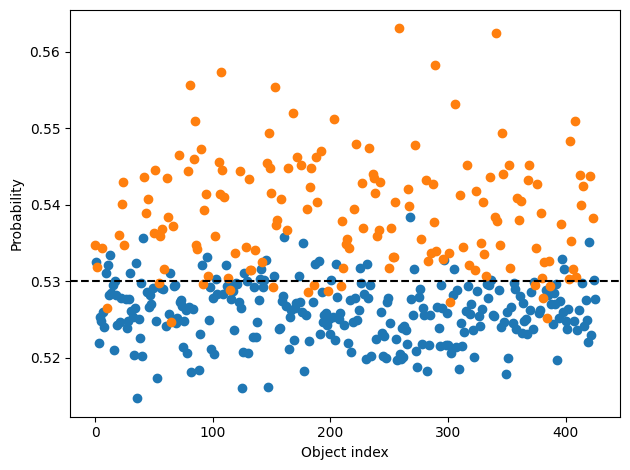

In [12]:
p_train = sigmoid(X_train * w_train)
p_treshold = 0.53

mask_train = y_train.astype(bool)
index = np.arange(y_train.shape[0])

plt.scatter(index[mask_train],  p_train[mask_train])
plt.scatter(index[~mask_train], p_train[~mask_train])
plt.axhline(p_treshold, color="black", linestyle="--")
plt.xlabel("Object index")
plt.ylabel("Probability")
plt.tight_layout();

Между объектами можно провести прямую, которая разделить два класса объектов. Построим ROC-кривую, по оси абсцисс мы должны отложить False Positive Rate (FPR), а по оси ординат True Positive Rate (TPR). Напомним,
- False Positive Rate (FPR): доля ложных false объектов, среди всех false объектов $$\dfrac{\rm FP}{{\rm FP} + {\rm TN}}$$
- True Positive Rate (TPR): доля истинно true объектов, среди всех true объектов $$\dfrac{\rm TP}{{\rm TP} + {\rm FN}}$$

В случае задачи определения болезни нам важно иметь большое значение TPR: лучше лишний раз проверить, чем не заметить.

Реализуем руками функции для TPR и FPR.

In [13]:
def tpr(p_treshold, p, y):
    actual_negative = y == False
    actual_positive = ~actual_negative
    predicted_negative = p > p_treshold
    predicted_positive = ~predicted_negative
    fn = np.logical_and(actual_positive, predicted_negative).sum()
    tp = np.logical_and(actual_positive, predicted_positive).sum()
    return tp / (tp + fn)

def fpr(p_treshold, p, y):
    actual_negative = y == False
    actual_positive = ~actual_negative
    predicted_negative = p > p_treshold
    predicted_positive = ~predicted_negative
    fp = np.logical_and(actual_negative, predicted_positive).sum()
    tn = np.logical_and(actual_negative, predicted_negative).sum()
    return fp / (fp + tn)

**Упражнение 4**: Нарисуйте зависимость FPR от TPR.

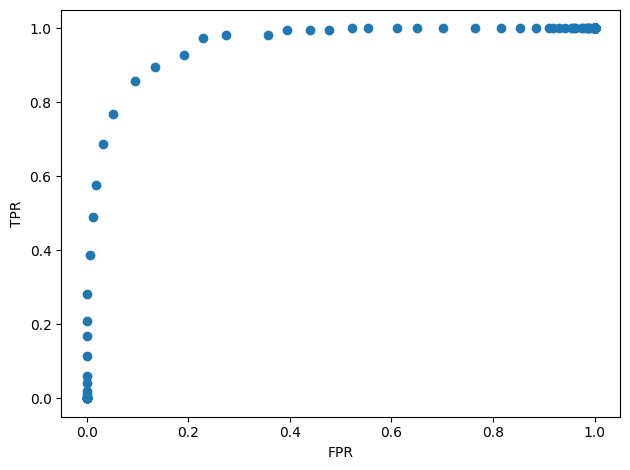

In [14]:
p_tresholds = np.linspace(0.50, 0.7, 201)

tpr_ = [tpr(p, p_train, y_train) for p in p_tresholds]
fpr_ = [fpr(p, p_train, y_train) for p in p_tresholds]

plt.scatter(fpr_, tpr_)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.tight_layout()

**Задание 1**: проделайте шаги из предыдущих упражнений уже на основе признака `mean area`.
1. Выделите `X` (`mean area`) и `y` (`target`).
2. Разделите выборку на тренировочную и обучающую, зафиксируйте случайность `random_state=1`.
3. Постройте функцию потерь (`loss_train`) $$ {\rm loss} = \sum\limits_{i = 1}^{N_{\rm train}}y_i \log\left( p_i \right) + (1 - y_i) \log\left( 1 - p_i \right),$$
где $$p_i = \dfrac{1}{1 + \exp(-x_i w)}.$$
4. Найдите оптимальное значение параметра $w$, в функцию `minimize` передайте аргумент `method="TNC"`.
5. \*Постройте распределение вероятностей.
6. \*Постройте AUC-кривую.

In [ ]:
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

# Место для вашего кода

 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 292.8977236587617
       x: [-2.846e-04]
     nit: 3
     jac: [ 2.716e-01]
    nfev: 38

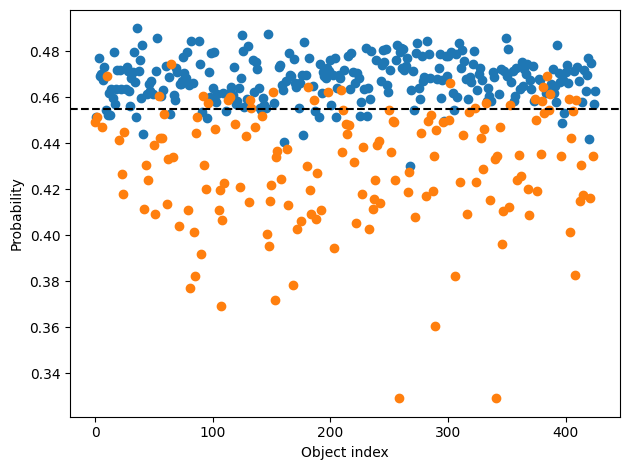

In [ ]:
# Место для кода отрисовки вероятностей


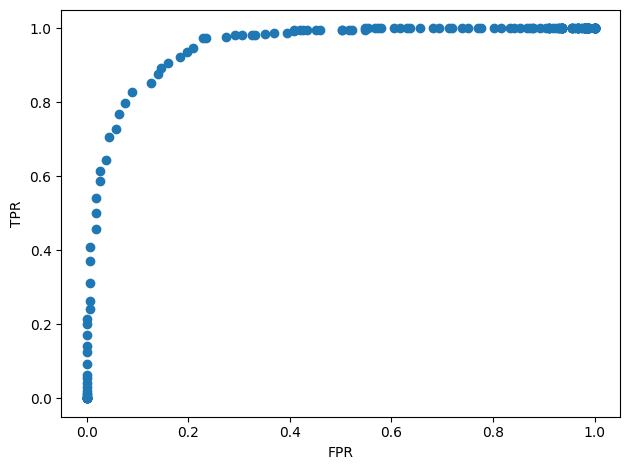

In [ ]:
# Место для кода AUC-кривой
# учтите изменение знака параметра (!)


Попробуем построить модель на основе двух признаков. Из графиков ниже хорошо подходят признаки `mean radius` и `mean symmetry`.

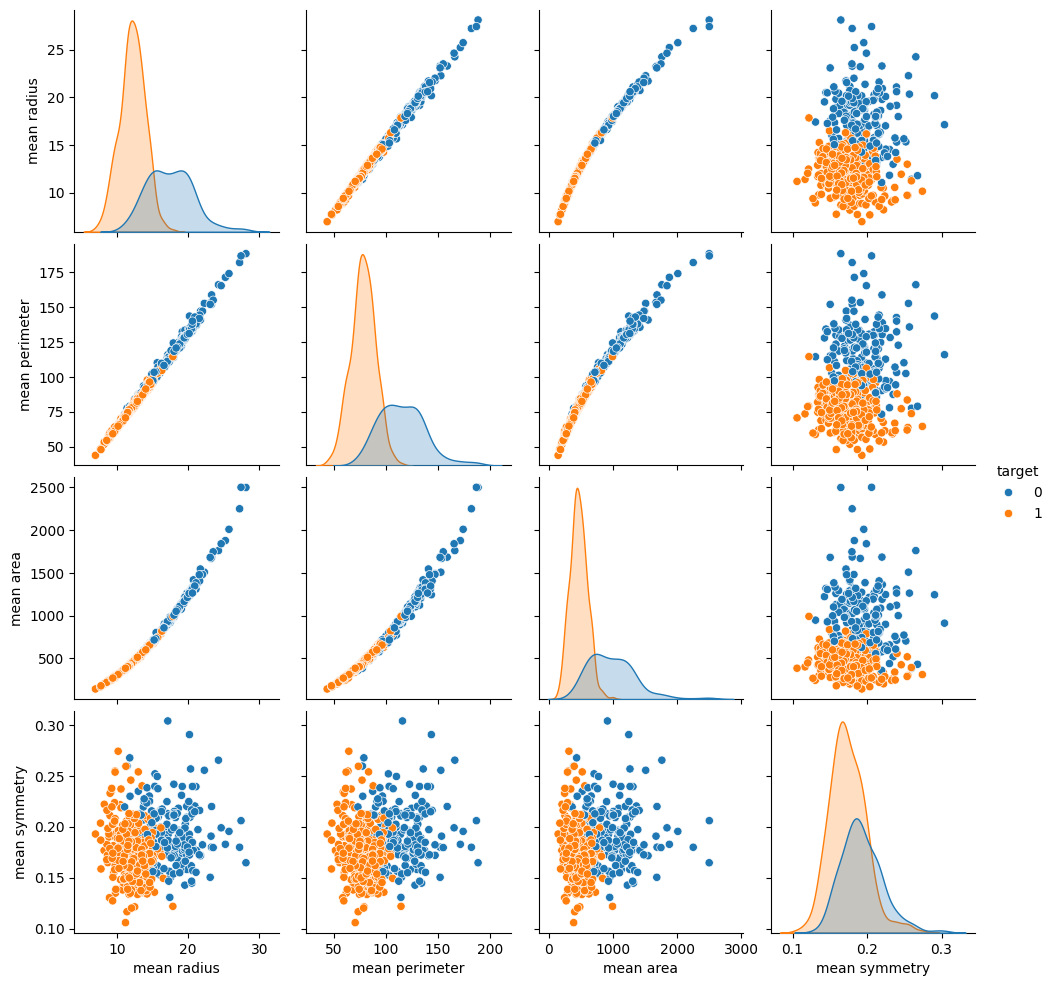

In [18]:
sns.pairplot(df[["mean radius", "mean perimeter", "mean area", "mean symmetry", "target"]], hue="target");

Повторим процедуру поиска минимальных параметров. Сейчас модель линейной регрессии выглядит следующим образом
$$ p = \dfrac{1}{1 + \exp\left( -x_0 w_0 - x_1 w_1 \right)} $$

In [19]:
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split


X = df[["mean symmetry", "mean radius"]].to_numpy().astype(float)
y = df["target"].to_numpy().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


loss_train = lambda t: -(y_train * np.log(sigmoid((X_train * t).sum(axis=1))).T + (1 - y_train) * np.log(1 - sigmoid((X_train * t).sum(axis=1))).T).sum(axis=0)

loss_train(np.array([0, 0]))
result_train = minimize(loss_train, np.array([0, 0]))
w_train = result_train["x"]

result_train

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 220.85783792193496
        x: [ 3.309e+01 -3.876e-01]
      nit: 16
      jac: [ 0.000e+00 -9.537e-06]
 hess_inv: [[ 4.986e+00 -5.933e-02]
            [-5.933e-02  7.755e-04]]
     nfev: 69
     njev: 23

Построим распределение признаков с учетом их меток и проведем "решающую" прямую.

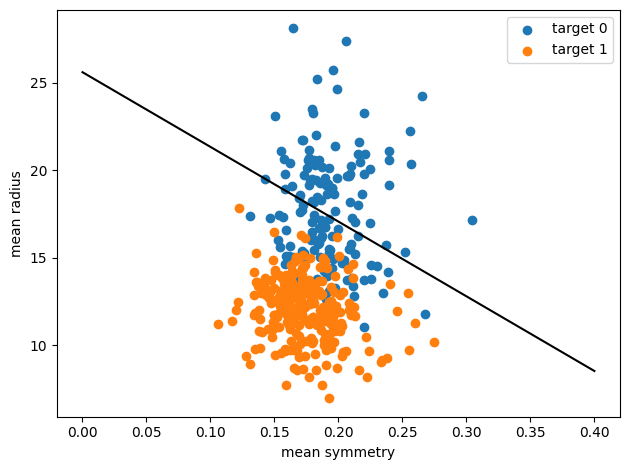

In [20]:
mask_train = ~y_train.astype(bool)
plt.scatter(X_train[mask_train, 0], X_train[mask_train, 1], label="target 0")
plt.scatter(X_train[~mask_train, 0], X_train[~mask_train, 1], label="target 1")

x0, x1 = 0.1, 0.3
plt.plot(
    # x w0 + y w1 = 0
    (0.4, 0),
    (-x0 * w_train[0] / w_train[1], -x1 * w_train[0] / w_train[1]),
    color="black"
)
plt.xlabel("mean symmetry")
plt.ylabel("mean radius")
plt.legend()
plt.tight_layout()

По графику видно, что решающая прямая незначительно смещена. Это смещение можно было бы учесть, если бы параметр `bias` имел значение не ноль.

**Упражнение 5**: попробуйте руками подобрать значение параметра `bias`. \*Попробуйте найти честно или численно значение параметра `bias`.

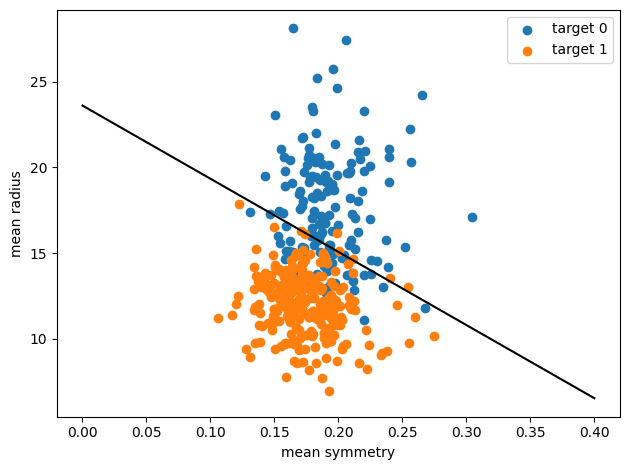

In [ ]:
mask_train = ~y_train.astype(bool)
plt.scatter(X_train[mask_train, 0], X_train[mask_train, 1], label="target 0")
plt.scatter(X_train[~mask_train, 0], X_train[~mask_train, 1], label="target 1")

x0, x1 = 0.1, 0.3
# Дополните код
bias = 
plt.plot(
    # bias + x w0 + y w1 = 0
    (0.4, 0),
    (bias - x0 * w_train[0] / w_train[1], bias - x1 * w_train[0] / w_train[1]),
    color="black"
)
plt.xlabel("mean symmetry")
plt.ylabel("mean radius")
plt.legend()
plt.tight_layout()

### LogisticRegression из рода sklearn

Теперь попробуем проделать шаги выше с помощью класса `LogisticRegression` из библиотеки `sklearn`. Здесь мы продолжим работу с признаком `mean area`.

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None, fit_intercept=False)

Сформируем данные для обучения и тестирования.

In [23]:
from sklearn.model_selection import train_test_split

X = df[["mean area"]].to_numpy().astype(float)
y = df["target"].to_numpy().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
model.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, penalty=None)

Ранее в параметрах модели мы указали `fit_intercept=False`. Это указывает на то, что константный параметр будет равен нулю (константный - не зависит от значений признаков). Ранее мы вводили константный параметр и называли его `bias` (**упражнение 5**).

In [25]:
model.intercept_, model.coef_

(array([0.]), array([[-0.00028455]]))

Можем сравнить полученный `model.coef_` здесь и в **задании 1**. Они должны быть идентичны.

Теперь отрисуем вероятности получения определенных меток объектами и их истинные метки.

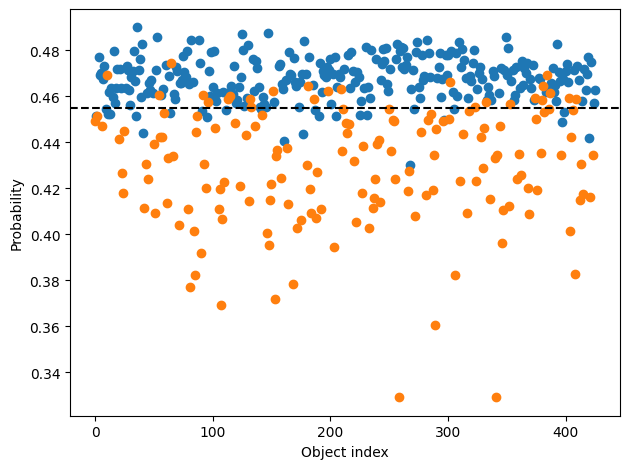

In [26]:
p_train = model.predict_proba(X_train)[:, 1]
p_treshold = 0.455

mask_train = y_train.astype(bool)
index = np.arange(y_train.shape[0])

plt.scatter(index[mask_train], p_train[mask_train])
plt.scatter(index[~mask_train], p_train[~mask_train])
plt.axhline(p_treshold, color="black", linestyle="--")
plt.xlabel("Object index")
plt.ylabel("Probability")
plt.tight_layout()

**Упражнение 6**: нарисуйте распределение вероятностей для тестовой выборки.

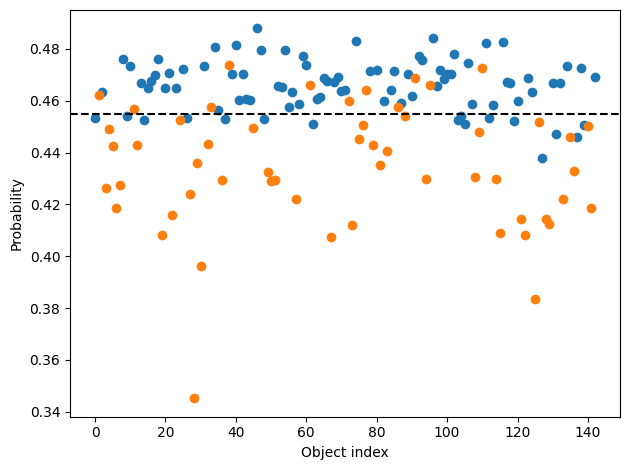

In [ ]:
# Дополните код
p_test = 
p_treshold = 0.455

mask_test = y_test.astype(bool)
index = np.arange(y_test.shape[0])

# Дополните код
plt.scatter(
plt.scatter(
plt.axhline(p_treshold, color="black", linestyle="--")
plt.xlabel("Object index")
plt.ylabel("Probability")
plt.tight_layout()

Коэффициент модели из `sklearn` находится в хорошем соответствии с ранее вычисленным коэффициентом. Абсолютное значение коэффициента много меньше 1. Это один из признаков, что модель не переобучилась. Сигмоида получилась достаточно плавной.

Теперь попробуем обучить нашу модель на всех признаках сразу.

In [ ]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Подавляем вывод предупреждений
# Попробуйте закомментировать строку ниже и проинтерпретируйте предупреждения
warnings.filterwarnings("ignore")

X = df.drop(columns=["target"]).to_numpy().astype(float)
y = df["target"].to_numpy().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LogisticRegression(penalty=None, fit_intercept=False)

model.fit(X_train, y_train)

model.coef_

array([[ 0.91108942,  0.52048793,  0.28552137, -0.01999206, -0.027577  ,
        -0.15618292, -0.22109332, -0.08988872, -0.05163527, -0.00721828,
         0.04864426,  0.15781153,  0.14332491, -0.08709572, -0.00263672,
        -0.03543694, -0.05263105, -0.01317098, -0.0134146 , -0.00299214,
         1.03893805, -0.50963026, -0.25096592, -0.0131343 , -0.04687837,
        -0.46556491, -0.6013324 , -0.17808359, -0.1354109 , -0.03754932]])

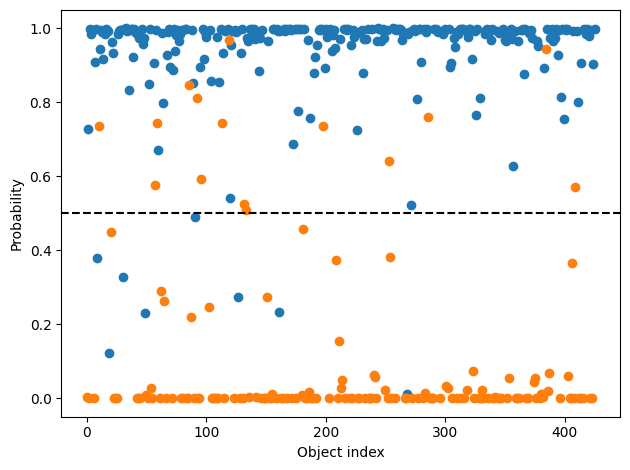

In [29]:
p_train = model.predict_proba(X_train)[:, 1]
p_treshold = 0.5

mask_test = y_train.astype(bool)
index = np.arange(y_train.shape[0])

plt.scatter(index[mask_test], model.predict_proba(X_train)[mask_test, 1])
plt.scatter(index[~mask_test], model.predict_proba(X_train)[~mask_test, 1])
plt.axhline(p_treshold, color="black", linestyle="--")
plt.xlabel("Object index")
plt.ylabel("Probability")
plt.tight_layout()

При добавлении новых признаков мы видим, что разделение между двумя классами значительно увеличилось. Больше информации, больше уверенность в правильном определении метки объекта.

**Упражнение 7**: постройте график выше уже с использованием тестовой выборки.

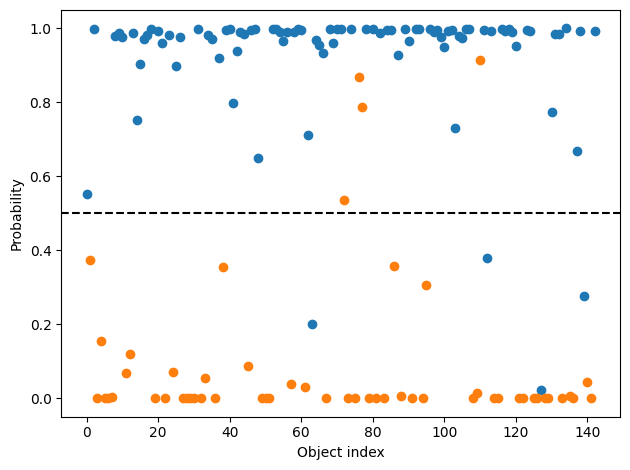

In [ ]:
# Вставьте код выше, но с нужной модификацией



Последний, но не менее важный шаг - ROC-кривая.

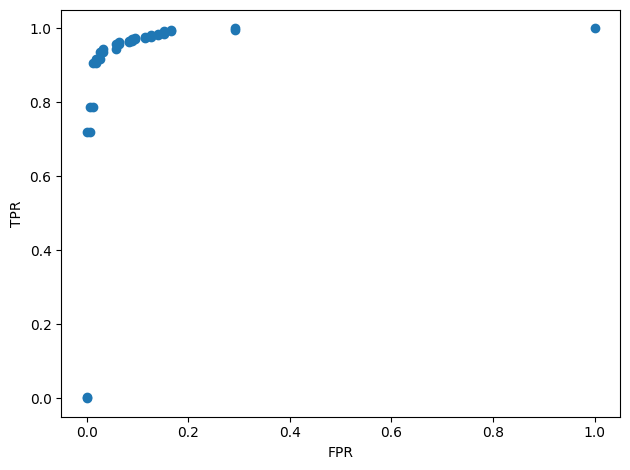

In [31]:
from sklearn.metrics import roc_curve

y_pred = model.predict_proba(X_train)[:, 1]

fpr, tpr, treshold = roc_curve(y_train, y_pred)

plt.scatter(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.tight_layout()

Добавление новых признаков в модель позволило значительно улучшить ее качество предсказания метки. Но все ли данные было одинаково полезно изспользовать при обучении? Можно ли откинуть часть параметров, которая имеет линейную зависимость (периметр, радиус, худший(?) радиус)?

Построим корреляционную матрицу признаков, а потом приступим к изучению влияния параметров на финальное качество модели.

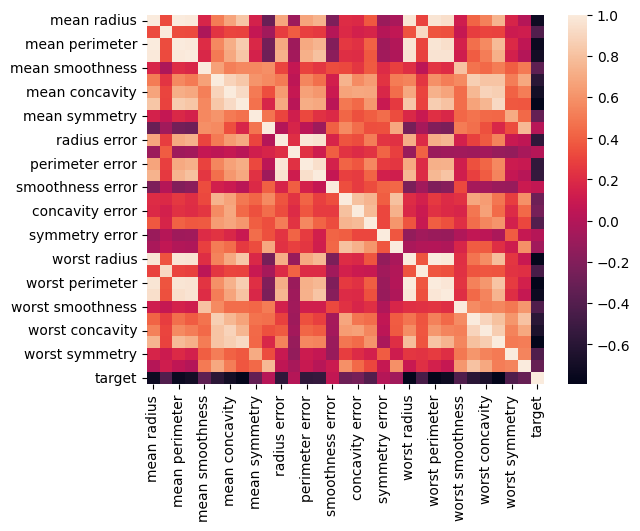

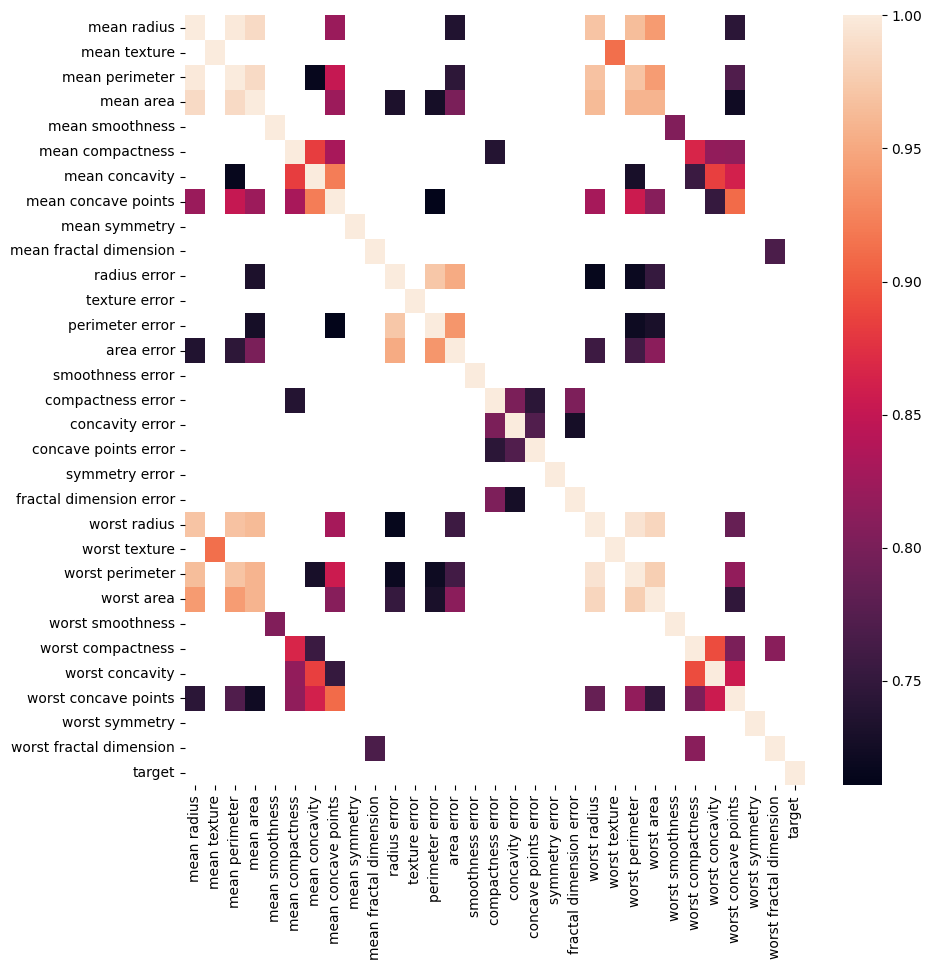

In [32]:
sns.heatmap(df.corr())
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr()[df.corr() > 0.7]);

Видим сильные (анти)корреляции между `area error`, `mean perimeter`, `worst radius`, `...`. Может ли модель самостоятельно исключить из рассмотрения такие (анти)коррелирующие признаки?

Давайте посмотрим на примере модели, которая работает с нормированными данными. Нормируем данные на основе тренировочной выборки и применим соответствующее преобразование к тестовой.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Создадим модель на основе нормированных данных и построем для нее ROC-кривую.

[[ 24.42868884  26.26459545   7.47090851  13.47740127 -40.66891296
   45.04001312 -36.62091769 -11.09398636  18.17812702  14.77053893
  -74.78967597  11.57592045  30.1463856  -44.51948625  -8.12923809
   23.24854122  23.59185251 -64.96665459  -6.1791321   61.5197699
  -33.88163597 -55.0605732  -47.93309317 -39.44646804  46.84876672
   -8.67761828 -32.70005121   2.17105075 -15.80083294 -66.24493215]]


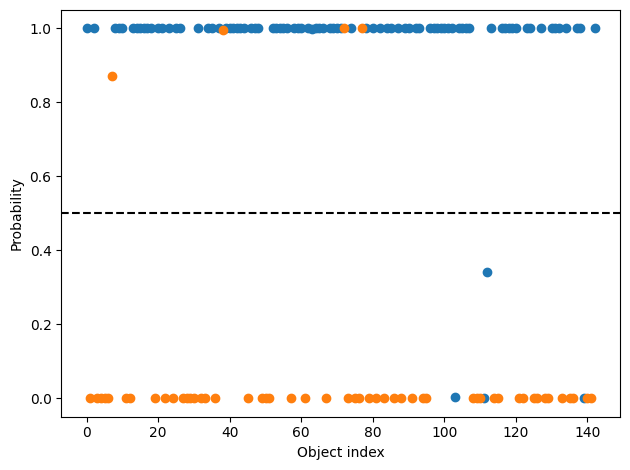

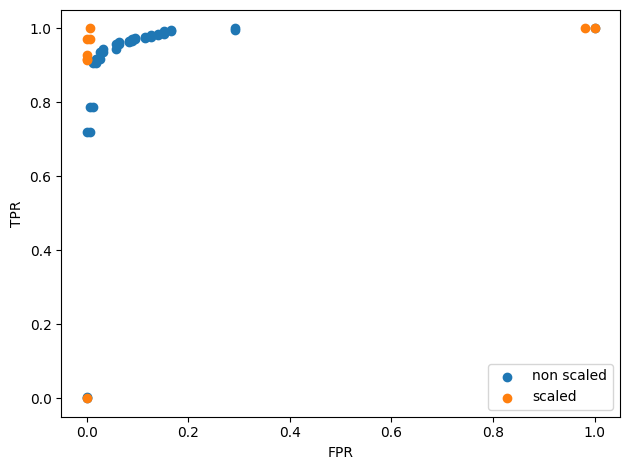

In [ ]:
import warnings
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

# Подавляем вывод предупреждений
# Попробуйте закомментировать строку ниже и проинтерпретируйте предупреждения
warnings.filterwarnings("ignore")

model_scaled = LogisticRegression(penalty=None, fit_intercept=False)
model_scaled.fit(X_train_scaled, y_train)

print(model_scaled.coef_)

p_test = model_scaled.predict_proba(X_test_scaled)[:, 1]
p_treshold = 0.5

mask_test = y_test.astype(bool)
index = np.arange(y_test.shape[0])

plt.scatter(index[mask_test], model_scaled.predict_proba(X_test_scaled)[mask_test, 1])
plt.scatter(index[~mask_test], model_scaled.predict_proba(X_test_scaled)[~mask_test, 1])
plt.axhline(p_treshold, color="black", linestyle="--")
plt.xlabel("Object index")
plt.ylabel("Probability")
plt.tight_layout()


y_pred = model_scaled.predict_proba(X_train_scaled)[:, 1]
fpr_scaled, tpr_scaled, treshold = roc_curve(y_train, y_pred)

plt.figure()
plt.scatter(fpr, tpr, label="non scaled")
plt.scatter(fpr_scaled, tpr_scaled, label="scaled")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.tight_layout()

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Not normalized data", f"Accuracy: {accuracy_score(y_test, model.predict(X_test))}", "Confusion matrix:", confusion_matrix(y_test, model.predict(X_test)), sep="\n")
print("Normalized data", f"Accuracy: {accuracy_score(y_test, model_scaled.predict(X_test_scaled))}", "Confusion matrix:", confusion_matrix(y_test, model_scaled.predict(X_test_scaled)), sep="\n")

Not normalized data
Accuracy: 0.9440559440559441
Confusion matrix:
[[51  4]
 [ 4 84]]
Normalized data
Accuracy: 0.9440559440559441
Confusion matrix:
[[51  4]
 [ 4 84]]


ROC-кривая зачительно изменилась. Теперь при малых значениях FPR мы можем сразу же получить высокие значения TPR. Меньше ложных срабатываний при одинаковом уровне правильных меток.

По графику распределения вероятностей мы можем сказать, что модель почти идеально предсказывает метки в каждом из случаев. Не является ли это косвенным признаком переобучения?

Посмотрим на веса моделей.

In [36]:
model.coef_, model_scaled.coef_

(array([[ 0.91108942,  0.52048793,  0.28552137, -0.01999206, -0.027577  ,
         -0.15618292, -0.22109332, -0.08988872, -0.05163527, -0.00721828,
          0.04864426,  0.15781153,  0.14332491, -0.08709572, -0.00263672,
         -0.03543694, -0.05263105, -0.01317098, -0.0134146 , -0.00299214,
          1.03893805, -0.50963026, -0.25096592, -0.0131343 , -0.04687837,
         -0.46556491, -0.6013324 , -0.17808359, -0.1354109 , -0.03754932]]),
 array([[ 24.42868884,  26.26459545,   7.47090851,  13.47740127,
         -40.66891296,  45.04001312, -36.62091769, -11.09398636,
          18.17812702,  14.77053893, -74.78967597,  11.57592045,
          30.1463856 , -44.51948625,  -8.12923809,  23.24854122,
          23.59185251, -64.96665459,  -6.1791321 ,  61.5197699 ,
         -33.88163597, -55.0605732 , -47.93309317, -39.44646804,
          46.84876672,  -8.67761828, -32.70005121,   2.17105075,
         -15.80083294, -66.24493215]]))

В случае масштабированных данных веса очень большие после обучения. Малое смещение параметра от центрального значения приводит к достаточно весомому значению в экспоненте. Реакция на признак гипертрафируется весом. Это и есть переобучение.

ПОпробуем избавиться от переобучения, воспользуемся параметром `penalty` класса `LogisticRegression`.

## Регуляризация параметров модели

Рассмотрим два подхода к регуляризации весов модели:
- L-2 регуляризация.
- L-1 регуляризация,

### L-2 регуляризация (Ridge)

К функции потерь добавляется член вида $$\alpha \sum\limits_{i = 1}^{M} w_i^2,$$
где $M$ - количество признаков, $w_i$ - веса модели, а $\alpha$ - "сила" регуляризации (гиперпараметр).

Данная регуляризация сильно штрафует за выбросы в данных, дает более устойчивый ответ.

### L-1 регуляризация (Lasso)

К функции потерь добавляется член вида $$\alpha \sum\limits_{i = 1}^{M} |w_i|,$$
где $M$ - количество признаков, $w_i$ - веса модели, а $\alpha$ - "сила" регуляризации (гиперпараметр).

Особенность данной регуляризации: позволяет уменьшить количество весов модели, оставляя только значимые признаки.

### Применение регуляризации

Рассмотрим влияние регуляризации к текущей задаче. В коде ниже вы можете отметить, что появляется несколько новых параметров у класса `LogisticRegression`:
- `C`: гиперпараметр регуляризации. Если говорить в терминах выше, то $C = \alpha^{-1}$. Является обратной величиной. Чем меньше значение `C`, тем сильнее регуляризация;
- `solver`: алгоритм нахождения минимума. Не любой алгоритм может найти минимум с учетом регуляризации. Ограничение каждого метода можно найти в [источнике eng](https://scikit-learn.org/stable/modules/linear_model.html#solvers) ([источник ru](https://scikit-learn.ru/stable/modules/linear_model.html#logistic-regression)).

Features (0-9):  mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension
Penalty: None
Weights of model:
[ 24.42868884  26.26459545   7.47090851  13.47740127 -40.66891296
  45.04001312 -36.62091769 -11.09398636  18.17812702  14.77053893
 -74.78967597  11.57592045  30.1463856  -44.51948625  -8.12923809
  23.24854122  23.59185251 -64.96665459  -6.1791321   61.5197699
 -33.88163597 -55.0605732  -47.93309317 -39.44646804  46.84876672
  -8.67761828 -32.70005121   2.17105075 -15.80083294 -66.24493215]
Accuracy: 0.9440559440559441

Penalty: l1
Weights of model:
[-0.37513017 -0.35673114 -0.35198494 -0.55796534  0.          0.
 -0.58482502 -0.7326736   0.          0.11972235 -0.99588632  0.
 -0.60982689 -0.77686849 -0.08373114  0.57483875  0.          0.
  0.          0.31776656 -1.03184394 -0.90827867 -0.90074073 -1.11075998
 -0.62721392  0.         -0.6078945  -0.91126836 -0.59024866 -0

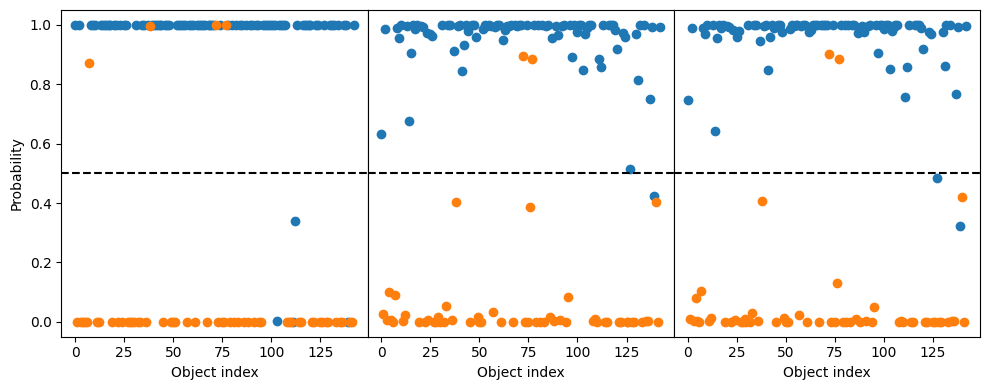

In [ ]:
import warnings
from sklearn.linear_model import LogisticRegression

# Подавляем вывод предупреждений
# Попробуйте закомментировать строку ниже и проинтерпретируйте предупреждения
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

print("Features (0-9): ", ", ".join(df.columns[:10]))

for penalty, solver, ax in zip([None, "l1", "l2"], ["lbfgs", "saga", "lbfgs"], axs):
    model = LogisticRegression(penalty=penalty, fit_intercept=False, solver=solver)
    model.fit(X_train_scaled, y_train)
    print(f"Penalty: {penalty}", "Weights of model:", model.coef_[0], f"Accuracy: {accuracy_score(y_test, model.predict(X_test_scaled))}", sep="\n")
    print()

    p_test = model_scaled.predict_proba(X_test_scaled)[:, 1]
    p_treshold = 0.5

    mask_test = y_test.astype(bool)
    index = np.arange(y_test.shape[0])

    ax.scatter(index[mask_test], model.predict_proba(X_test_scaled)[mask_test, 1])
    ax.scatter(index[~mask_test], model.predict_proba(X_test_scaled)[~mask_test, 1])
    ax.axhline(p_treshold, color="black", linestyle="--")
    ax.set_xlabel("Object index")

axs[0].set_ylabel("Probability")
axs[1].set_yticks([])
axs[2].set_yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace=0)

Отметим следующие особенности:
- Мы не наблюдаем переобучения в случаях использования регуляризаций;
- В случае L-1 видим, что часть весов занулилась, признаки были отброшены моделью. Модель сообразила, что часть признаков повторяют друг друга (радиус опухоли, ее переметр). Эту фильтрацию мы могли бы и самостоятельно применить, если бы обладали достаточной экспертизой в данных.
- В случа L-2 видим, что малые значения весов примерно соответствуют нулевым весам из L-1, но не всегда.

**Задание 2**: попробуйте обучить модель логистической регрессии на игрушечных данных ниже. Проследите какие именно признаки уходят из рассмотрения при подключении регуляризаций.

\*Попробуйте воспользоваться классом `GridSearchCV` для подбора гиперпараметра `C`.

In [38]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve


X_corr, y_corr = make_classification(
    n_samples=1000,
    n_features=5,
    n_classes=2,
    n_redundant=1,
    n_repeated=1,
    random_state=2,
)

df_corr = pd.DataFrame(np.vstack((X_corr.T, y_corr)).T, columns=["x0", "x1", "x2", "x3", "x4", "target"])



X_uncorr, y_uncorr = make_classification(
    n_samples=1000,
    n_features=5,
    n_classes=2,
    n_redundant=0,
    n_repeated=1,
    random_state=2,
)

df_uncorr = pd.DataFrame(np.vstack((X_uncorr.T, y_uncorr)).T, columns=["x0", "x1", "x2", "x3", "x4", "target"])

In [39]:
# Ваш код для моделей на коррелированных и некоррелированных данных
# с применением и без разных регуляризаций



**Задание 3**: проанализируйте набор данных Титаник. Предскажите выживаемость человека по входным признакам. Попробуйте реализовать модель в несколько этапов:
- Используйте только два признака: пол `sex` и возраст `age`. Не забудьте перевести категориальные признаки в численные с помощью `LabelEncoder`;
- Разделите выборку на обучающую и тестовую;
- Нормируйте данные и повторите предыдущий этап;
- Возьмите в рассмотрение признаки `pclass`, `class`, `embarked`, `alone`, `fare`;
- Примените регуляризации, посмотрите какие признаки уйдут из рассмотрения.

In [40]:
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = load_dataset("titanic")

df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

**Задание 4\***: разработайте алгоритм распознавания пингвинов. Присмотритесь, количество конечных классов не равно 2, но это не долнжо быть сложностью для алгоритма логистической регрессии.

In [41]:
import seaborn as sns

df = sns.load_dataset("penguins")

feature_names = df.columns[1:]
target_name = df.columns[0]

print(df[target_name].unique())

df.head()

['Adelie' 'Chinstrap' 'Gentoo']


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

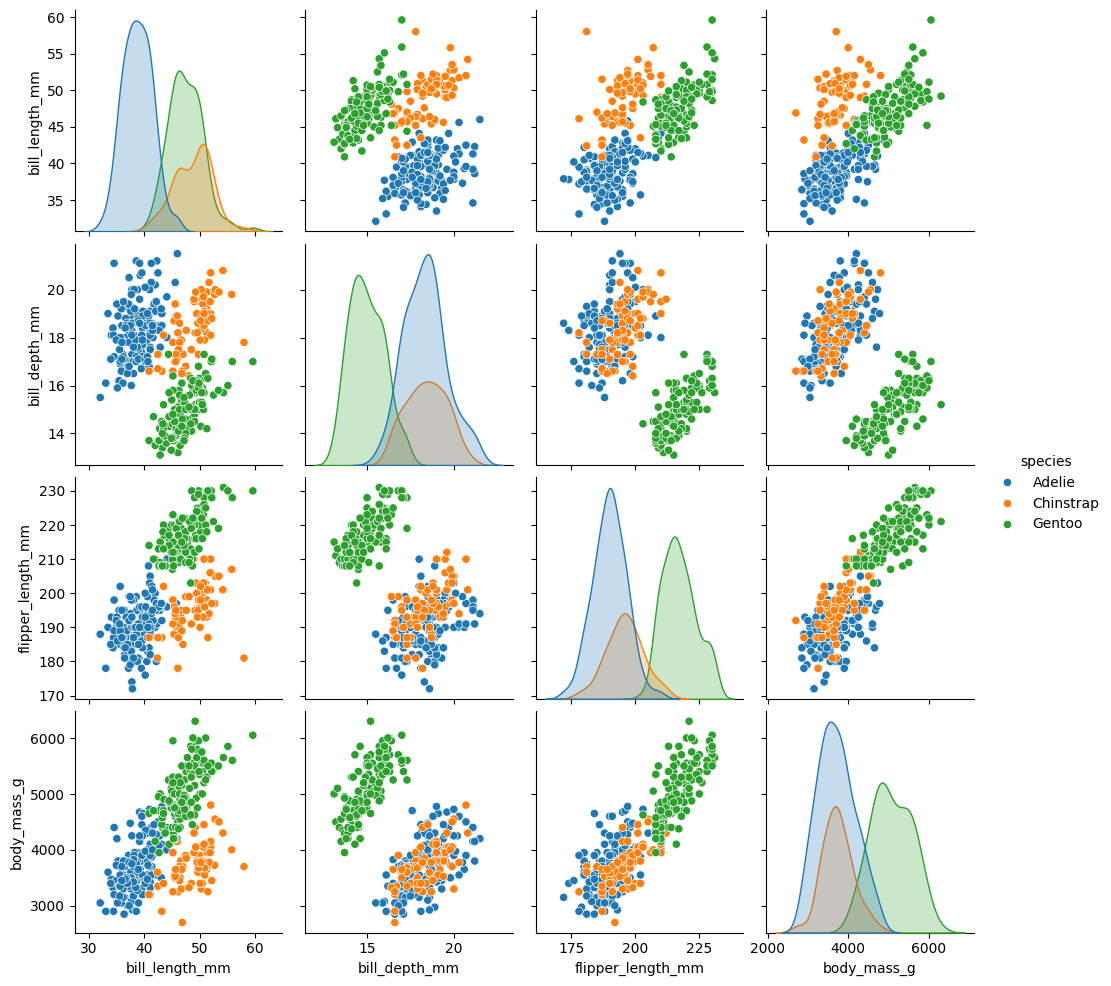

In [42]:
sns.pairplot(df, hue='species');

# Дополнительные материалы